In [5]:
import pandas as pd
import numpy as np
import ISLP
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS, poly, contrast)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [2]:
from functools import partial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 2 (h)

In [2]:
rng=np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
   store[i]=np.sum( rng.choice(np.arange(1,101),replace=True) ==4)
np.mean(store)

0.0081

In [3]:
import random
n = 100
N = 10000
count = 0
for _ in range(N):
    count += 4 in random.choices(range(1,n+1), k=n) 

print(count/N)

0.638


# Question 5

In [2]:
Default=load_data('default')
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## A

In [18]:
y=np.where(Default['default'] == 'No' ,0 ,1)
X=MS(['balance','income']).fit_transform(Default)
result=sm.GLM(y,X,family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Wed, 18 Sep 2024   Deviance:                       1579.0
Time:                        14:09:30   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================
"""

In [36]:
y=np.where(Default['default'] == 'No' ,0 ,1)
X=MS(['balance','income']).fit_transform(Default)
logit=sm.Logit(y,X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.4594
Time:                        14:28:49   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
y=Default['default']
X=Default[['balance','income']]
log_reg=LogisticRegression(C=1e10,tol=1e-5)
log_reg.fit(X,y)
log_reg.classes_,log_reg.coef_,log_reg.intercept_

(array(['No', 'Yes'], dtype=object),
 array([[5.64710295e-03, 2.08089755e-05]]),
 array([-11.54046844]))

In [32]:
log_reg=LogisticRegression(C=1e40, solver='lbfgs')
log_reg.fit(X,y)
log_reg.classes_,log_reg.coef_,log_reg.intercept_

(array(['No', 'Yes'], dtype=object),
 array([[5.64710295e-03, 2.08089755e-05]]),
 array([-11.54046844]))

## B ,C 

In [96]:
X_train,X_test,y_train,y_test=train_test_split(Default[['balance','income']],
                                               Default['default'],test_size=0.5)

In [97]:
log_reg=LogisticRegression(penalty=None)
log_reg.fit(X_train,y_train)
prob=log_reg.predict_proba(X_test)
result=np.where(prob[:,1]>0.5,'Yes','No')
log_reg.coef_,log_reg.intercept_,log_reg.classes_,1-np.mean(np.array(y_test) == np.array(result))

(array([[5.69030338e-03, 1.67313432e-05]]),
 array([-11.46659774]),
 array(['No', 'Yes'], dtype=object),
 0.02639999999999998)

In [98]:
y_tst=np.where(np.array(y_test) == 'No' ,0 ,1)
y_trn=np.where(np.array(y_train) == 'No' ,0 ,1)
X_trn=MS(['balance','income']).fit_transform(X_train)
logit=sm.Logit(y_trn,X_trn).fit()
logit.summary()#['intercept','balance','income']

Optimization terminated successfully.
         Current function value: 0.079298
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.4582
Time:                        15:25:27   Log-Likelihood:                -396.49
converged:                       True   LL-Null:                       -731.85
Covariance Type:            nonrobust   LLR p-value:                2.279e-146
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.4666      0.616    -18.619      0.000     -12.674     -10.260
balance        0.0057      0.000     17.628      0.000       0.005       0.006
income      1.673e-05   7.13e-06      2.348      0.019    2.76e-06    3.07e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [99]:
X_tst=X_test.copy()
X_tst.insert(loc=0,column='Intercept',value=1)
pred=logit.predict(X_tst)
1-np.mean(np.where(pred>0.5,1,0) == y_tst)

0.02639999999999998

In [100]:
confusion_table(result,y_test)

Truth,No,Yes
Predicted,,
No,4815,113
Yes,19,53


## D

In [110]:
df=pd.get_dummies(Default,drop_first=True,columns=['student'])
df

,default,balance,income,student_Yes
0,No,729.526495,44361.625074,False
1,No,817.180407,12106.134700,True
2,No,1073.549164,31767.138947,False
3,No,529.250605,35704.493935,False
4,No,785.655883,38463.495879,False
...,...,...,...,...
9995,No,711.555020,52992.378914,False
9996,No,757.962918,19660.721768,False
9997,No,845.411989,58636.156984,False
9998,No,1569.009053,36669.112365,False


In [121]:
X_train,X_test,y_train,y_test=train_test_split(df[['balance','income','student_Yes']],
                                               Default['default'],test_size=0.5)

In [122]:
X_train[:2]

,balance,income,student_Yes
4745,651.325135,51583.250203,False
7568,1294.285702,17444.603565,True


In [123]:
log_reg=LogisticRegression(penalty=None)
log_reg.fit(X_test,y_test)
prob=log_reg.predict_proba(X_test)
prob
result=np.where(prob[:,1]>0.5,'Yes','No')
log_reg.coef_,log_reg.intercept_,log_reg.classes_,1-np.mean(np.array(y_test) == np.array(result))

(array([[ 5.89261106e-03,  1.17501834e-05, -5.19628703e-01]]),
 array([-11.34467471]),
 array(['No', 'Yes'], dtype=object),
 0.028000000000000025)

In [135]:
y_tst=np.where(np.array(y_test) == 'No' ,0 ,1)
y_trn=np.where(np.array(y_train) == 'No' ,0 ,1)
X_tst=X_test.copy()
X_tst.insert(loc=0,column='Intercept',value=1)
X_tst['student_Yes']=X_tst['student_Yes'].astype('int')
X_trn=MS(['balance','income','student_Yes']).fit_transform(X_train)
logit=sm.Logit(y_trn,X_trn).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.078313
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.4389
Time:                        15:38:35   Log-Likelihood:                -391.56
converged:                       True   LL-Null:                       -697.88
Covariance Type:            nonrobust   LLR p-value:                1.846e-132
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     -10.4303      0.680    -15.336      0.000     -11.763      -9.097
balance         0.0056      0.000     17.027      0.000       0.005       0.006
income      -5.469e-06   1.16e-05     -0.470      0.638   -2.83e-05    1.73e-05
student_Yes    -0.7572      0.333     -2.275      0.023      -1.410      -0.105
===============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [136]:
pred=logit.predict(X_tst)
1-np.mean(np.where(pred>0.5,1,0) == y_tst)

0.028200000000000003

In [137]:
confusion_table(result,y_test)

Truth,No,Yes
Predicted,,
No,4800,116
Yes,24,60


# Question 6

## A

In [138]:
y=np.where(Default['default'] == 'No' ,0 ,1)
X=MS(['balance','income']).fit_transform(Default)
result=sm.GLM(y,X,family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Wed, 18 Sep 2024   Deviance:                       1579.0
Time:                        18:08:09   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================
"""

## B

In [207]:
def boot_fn(model,endog,df,idx):
    ''' returns fitted parameters'''
    df_=df.iloc[idx,:]
    y_test=df_[endog]
    X_test=model.fit_transform(df_)
    result=sm.GLM(y_test,X_test,family=sm.families.Binomial()).fit()
    return np.array(result.params)
new_fn=partial(boot_fn,model,endog)

In [219]:
def boot_df(df,endog,len=None,seed=0):
    '''returns df sampled to be used for bootstrapping'''
    len=len or Default.shape[0]//2
    rng=np.random.default_rng()
    idx=np.array(rng.choice(a=Default.shape[0],size=len))
    return new_fn(df,idx)
# val=new_fn(df,idx)
# err=np.c_[err,val]
# err,val

In [223]:
value,err=1000,[]
df=pd.get_dummies(Default,columns=['default'],drop_first=True).rename(columns={"default_Yes":"default"})
endog='default'
model=MS(['balance','income'])
for i in range(value):
    err.append(boot_df(df,endog))
print(np.array(err).mean(axis=0))

[-1.15922271e+01  5.67588220e-03  2.08898121e-05]


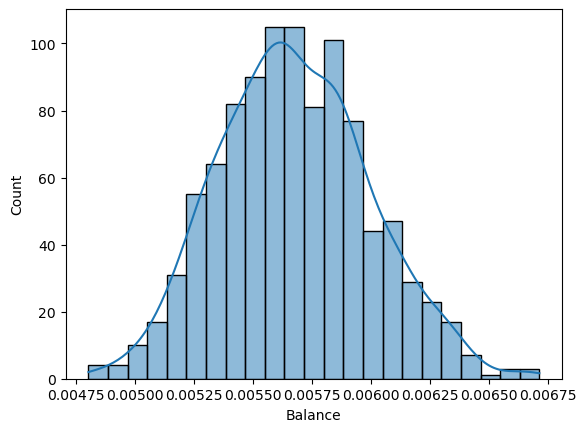

In [235]:
sns.histplot(np.array(err)[:,1],kde=True)
plt.xlabel("Balance");

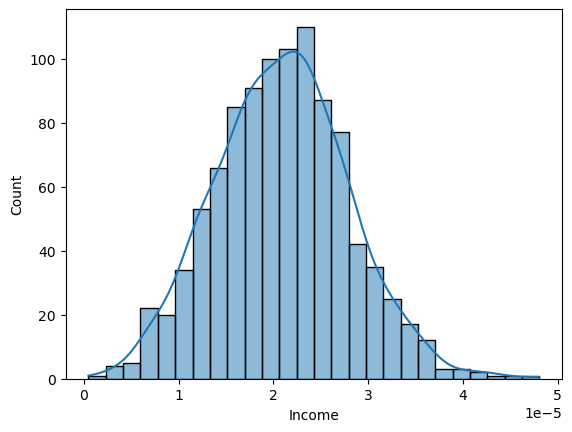

In [236]:
sns.histplot(np.array(err)[:,2],kde=True)
plt.xlabel("Income");

# Question 7

In [238]:
Weekly=load_data('Weekly')
Weekly[:2]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down


## A

In [246]:
X=MS(['Lag1','Lag2']).fit_transform(Weekly)
y=np.where(Weekly['Direction'] == 'Down',0,1)
result=sm.GLM(y,X,family=sm.families.Binomial()).fit()

In [250]:
X=Weekly[['Lag1','Lag2']]
y=Weekly['Direction']
log_reg=LogisticRegression(penalty=None)
log_reg.fit(X,y)

LogisticRegression(penalty=None)

## B

In [255]:
X=MS(['Lag1','Lag2']).fit_transform(Weekly.iloc[1:])
y=np.where(Weekly.iloc[1:]['Direction'] == 'Down',0,1)
result=sm.GLM(y,X,family=sm.families.Binomial()).fit()

In [257]:
X=Weekly.iloc[1:][['Lag1','Lag2']]
y=Weekly.iloc[1:]['Direction']
log_reg=LogisticRegression(penalty=None)
log_reg.fit(X,y)

LogisticRegression(penalty=None)

## C

In [259]:
log_reg.predict(Weekly[0:1][['Lag1','Lag2']])

array(['Up'], dtype=object)

## D

In [298]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [322]:
pd.DataFrame(Weekly.iloc[1][['Lag1','Lag2']]).T
Weekly.shape

np.array([[1,2]])[0,1]

2

In [324]:
n=Weekly.shape[0]
log_reg=LogisticRegression(penalty=None)
dic={'Probability for UP':[],'Prediction':[],'Actual':[],'Correctness':[]}
for i in range(n):
    X=Weekly[['Lag1','Lag2']].drop(i)
    y=Weekly['Direction'].drop(i)
    log_reg.fit(X,y)
    prob=log_reg.predict_proba(pd.DataFrame(Weekly.iloc[i][['Lag1','Lag2']]).T)
    dic['Probability for UP'].append(round(prob[0,1],2))
    dic['Actual'].append(Weekly.iloc[i]['Direction'])
    dic['Prediction'].append('Up') if (prob[:,1] >= 0.5) else dic['Prediction'].append('Down')
    dic['Correctness'].append(1) if (Weekly.iloc[i]['Direction'] == dic['Prediction'][i]) else dic['Correctness'].append(0)
    
df=pd.DataFrame(dic)
df.head()

,Probability for UP,Prediction,Actual,Correctness
0,0.57,Up,Down,0
1,0.57,Up,Down,0
2,0.57,Up,Up,1
3,0.48,Down,Up,0
4,0.60,Up,Up,1


## E

In [325]:
np.mean(df['Correctness'])

0.5500459136822773

# Question 8

In [3]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

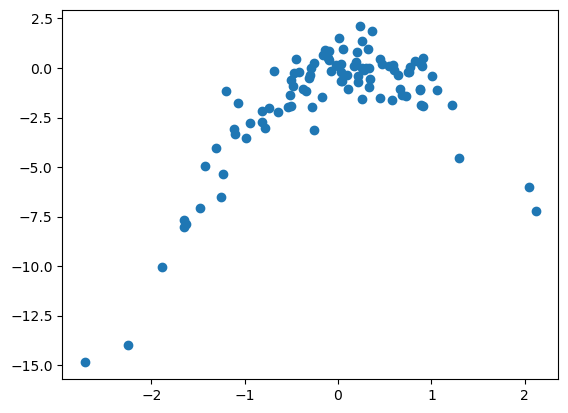

In [4]:
plt.scatter(x,y);

## C

In [152]:
rng = np.random.default_rng (10)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)
data=pd.DataFrame({'X':x,"Y":y})
data[:2]

,X,Y
0,-1.103338,-3.737497
1,-0.725025,-0.859781


In [153]:
def get_LOOCV(deg):
    n=data.shape[0]
    val=[]
    for i in range(n):
        X_train=MS([poly('X',degree=deg,raw=True)]).fit_transform(data.drop(i))
        x_dg=[]
        dt=data.iloc[i]['X']
        for d in range(deg+1):
            x_dg.append(dt**d)
        X_test=pd.DataFrame(data=x_dg).T
        # X_test=MS([poly('X',degree=deg,raw=True)]).fit_transform(data.iloc[i].to_frame().T)
        y_train=data['Y'].drop(i)
        y_test=data.iloc[i]['Y']
        result=sm.OLS(y_train,X_train).fit()
        pred=result.predict(X_test)
        mse=(pred-y_test)**2
        val.extend(mse)
    return np.mean(np.array(val))

In [154]:
get_LOOCV(1),get_LOOCV(2),get_LOOCV(3),get_LOOCV(4)

(5.671283893130448, 1.1594262155692299, 1.1720640079418374, 1.172648657959862)

In [155]:
rng = np.random.default_rng (5)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)
data=pd.DataFrame({'X':x,"Y":y})
data[:2]

,X,Y
0,-0.801931,-2.809435
1,-1.324359,-5.351972


In [156]:
get_LOOCV(1),get_LOOCV(2),get_LOOCV(3),get_LOOCV(4)

(6.089221224990883, 1.0537181194875813, 1.0872514052641025, 1.2655529775418333)

# Question 9

In [160]:
Boston=load_data('Boston')
Boston[:2],Boston.shape

(      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
 
    lstat  medv  
 0   4.98  24.0  
 1   9.14  21.6  ,
 (506, 13))

In [161]:
Boston['medv'].mean()

22.532806324110677

In [164]:
medv_SE=Boston['medv'].std()/len(Boston)**0.5
medv_SE

0.4088611474975351

In [187]:
std=[]
for _ in range(1000):
    std.append(np.std(Boston['medv'].sample(506,replace=True)))
std_av=np.mean(np.array(std))
SE_mu_boot=std_av/len(Boston)**0.5
SE_mu_boot

0.4083038074450869

In [198]:
std=[]
for _ in range(1000):
    std.append(np.mean(Boston['medv'].sample(506,replace=True)))
np.std(std)

0.4254613496315137

In [189]:
Boston['medv'].mean()+2*SE_mu_boot,Boston['medv'].mean()-2*SE_mu_boot,

(23.34941393900085, 21.716198709220503)

In [190]:
Boston['medv'].median()

21.2

In [191]:
med=[]
for _ in range(1000):
    med.append(np.median(Boston['medv'].sample(506,replace=True)))
SE_med=np.std(np.array(med))
SE_med

0.3724795296388779

In [194]:
np.percentile(Boston['medv'],10), Boston['medv'].quantile(0.1)

(12.75, 12.75)

In [197]:
med=[]
for _ in range(1000):
    med.append(np.percentile(Boston['medv'].sample(506,replace=True),10))
np.std(med)

0.4929349830352883